In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from nltk import agreement

drive.mount('/content/drive')
pd.options.mode.chained_assignment = None

Mounted at /content/drive


In [2]:
df=pd.read_csv("/content/drive/MyDrive/Masterthesis/Results/Survey Text Generation Quality.csv")

In [3]:
df.head()

,Sygnatura czasowa,Wie alt bist du?,Wähle dein Geschlecht,Wähle eine Farbe aus!,Dieser Text ist positiv.,Dieser Text ist frei von Rechtschreib- und Grammatikfehlern.,Dieser Text ist gut strukturiert.,Dieser Text ist leicht verständlich.,Ein Muttersprachler könnte den Text genauso geschrieben haben.,Dieser Text ergibt Sinn.,...,Dieser Text ergibt Sinn..16,Die Übergänge in dem Text sind gut geschrieben.16,Dieser Text ist positiv..17,Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..17,Dieser Text ist gut strukturiert..17,Dieser Text ist leicht verständlich..17,Ein Muttersprachler könnte den Text genauso geschrieben haben..17,Dieser Text ergibt Sinn..17,Die Übergänge in dem Text sind gut geschrieben.17,Ein nachträglicher menschlicher Eingriff kann die Textqualität verbessern.
0,2023/11/18 5:25:35 PM CET,über 60,Männlich,Grün,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja
1,2023/11/18 5:57:10 PM CET,über 60,Männlich,Grün,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja
2,2023/11/18 6:29:47 PM CET,zwischen 40 und 60,Weiblich,Grün,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ich weiss es nicht
3,2023/11/18 6:30:59 PM CET,zwischen 40 und 60,Weiblich,Grün,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja
4,2023/11/18 6:55:33 PM CET,zwischen 30 und 40,Männlich,Grün,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ja


([<matplotlib.patches.Wedge at 0x7b42aea8fe80>,
 [Text(1.0609160950202328, 0.2906149330764345, 'unter 30'),
  Text(0.6524977350793837, 0.8855770467419956, 'über 60'),
  Text(-0.9068857318776834, 0.6225417811815354, 'zwischen 40 und 60'),
  Text(0.32590324885051225, -1.050612712843644, 'zwischen 30 und 40')])

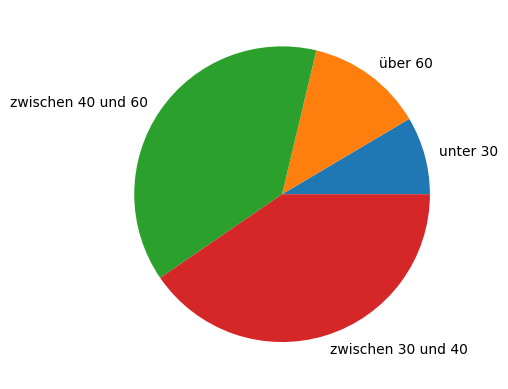

In [4]:
df_age=pd.DataFrame(df.groupby(["Wie alt bist du?"]).count()["Wähle dein Geschlecht"])
df_age.reset_index(inplace=True)
df_age = df_age.sort_values(by="Wähle dein Geschlecht")
fig, ax = plt.subplots()
ax.pie(df_age["Wähle dein Geschlecht"],labels=df_age["Wie alt bist du?"])

In [5]:
df_age

,Wie alt bist du?,Wähle dein Geschlecht
0,unter 30,4
3,über 60,6
2,zwischen 40 und 60,18
1,zwischen 30 und 40,19


([<matplotlib.patches.Wedge at 0x7b42ac99c790>,
 [Text(1.0975435666409765, 0.07347189479661434, 'Divers'),
  Text(0.7101906352504893, 0.8400174174399639, 'Weiblich'),
  Text(-0.7647117367945749, -0.7907059880945793, 'Männlich')])

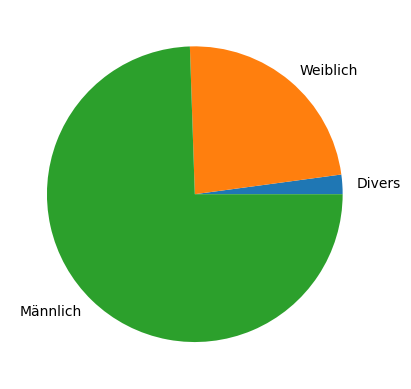

In [6]:
df_age=pd.DataFrame(df.groupby(["Wähle dein Geschlecht"]).count()["Wie alt bist du?"])
df_age.reset_index(inplace=True)
df_age = df_age.sort_values(by="Wie alt bist du?")
fig, ax = plt.subplots()
ax.pie(df_age["Wie alt bist du?"],labels=df_age["Wähle dein Geschlecht"])

In [7]:
def sentiment_neg_convert(score):
  if score==1:
    return 5
  if score==2:
    return 4
  if score==3:
    return 3
  if score==4:
    return 2
  if score==5:
    return 1

In [8]:
df_gruen=df[df["Wähle eine Farbe aus!"]=="Grün"]
df_gruen=df_gruen.dropna(axis=1)
df_gruen=df_gruen.sample(n=14, random_state=0)
df_gelb=df[df["Wähle eine Farbe aus!"]=="Gelb"]
df_gelb=df_gelb.dropna(axis=1)
df_gelb=df_gelb.sample(n=14, random_state=0)
df_lila=df[df["Wähle eine Farbe aus!"]=="Lila"]
df_lila=df_lila.dropna(axis=1)
df_lila=df_lila.sample(n=14, random_state=0)

In [9]:
df_gruen_for_kappa=df_gruen.iloc[:,4:-1]
df_gruen_for_kappa_tp=df_gruen_for_kappa.T
def kappa(df):
  annotations=[]
  for i in df.index:
    user=i
    for j in df.columns:
      task=j
      score=df.loc[i,j]
      annotations.append([user,task,score])
  annotations

  annotationtask = agreement.AnnotationTask(data=annotations)
  return annotationtask.multi_kappa()


In [10]:
df_gelb_for_kappa=df_gelb.iloc[:,4:-1]
df_gruen_for_kappa=df_gruen.iloc[:,4:-1]
df_lila_for_kappa=df_lila.iloc[:,4:-1]
print(kappa(df_gelb_for_kappa))
print(kappa(df_gruen_for_kappa))
print(kappa(df_lila_for_kappa))

0.1787938061579943
0.14342995966695757
0.18296739853626073


# Analysis influence keywords and sentiment

## Matches the sentiment the selected one?

<Axes: xlabel='sentiment'>

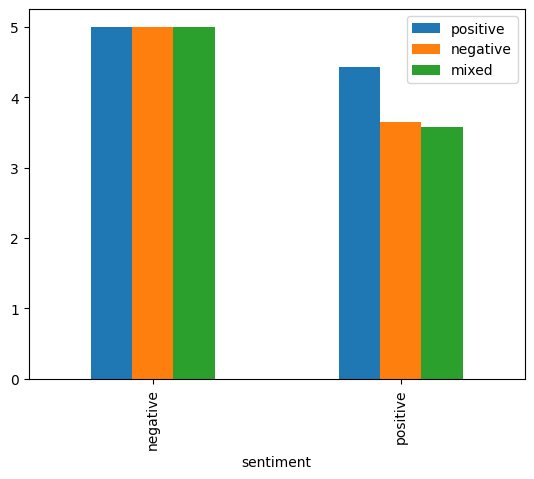

In [11]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["negative"]=df_gelb["Dieser Text ist positiv."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["positive"]=df_lila[["Dieser Text ist positiv..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["mixed"]=df_gruen[["Dieser Text ist positiv..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["negative"]=df_gruen["Dieser Text ist positiv..3"].apply(sentiment_neg_convert)
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["positive"]=df_gelb["Dieser Text ist positiv..4"].apply(sentiment_neg_convert)
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["mixed"]=df_lila["Dieser Text ist positiv..5"].apply(sentiment_neg_convert)
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent_grouped=sent.groupby(["sentiment"]).mean().reset_index()

sent_grouped.plot(x="sentiment", y=["positive", "negative","mixed"], kind="bar")

In [12]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["score"]=df_gelb["Dieser Text ist positiv."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["score"]=df_lila[["Dieser Text ist positiv..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["score"]=df_gruen[["Dieser Text ist positiv..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["score"]=df_gruen["Dieser Text ist positiv..3"].apply(sentiment_neg_convert)
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["score"]=df_gelb["Dieser Text ist positiv..4"].apply(sentiment_neg_convert)
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["score"]=df_lila["Dieser Text ist positiv..5"].apply(sentiment_neg_convert)
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent.groupby(["sentiment"]).mean()

,score
sentiment,
negative,5.000000
positive,3.880952


<Axes: xlabel='sentiment'>

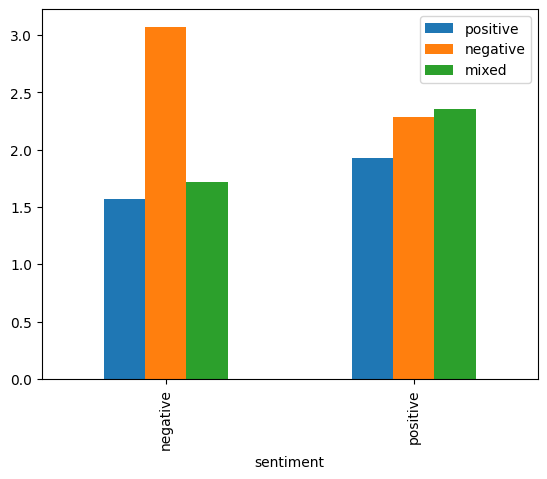

In [13]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["negative"]=df_gelb["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["positive"]=df_lila[["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["mixed"]=df_gruen[["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["negative"]=df_gruen["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..3"]
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["positive"]=df_gelb["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..4"]
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["mixed"]=df_lila["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..5"]
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent_grouped=sent.groupby(["sentiment"]).mean().reset_index()

sent_grouped.plot(x="sentiment", y=["positive", "negative","mixed"], kind="bar")

In [14]:
df.columns

Index(['Sygnatura czasowa', 'Wie alt bist du?', 'Wähle dein Geschlecht',
       'Wähle eine Farbe aus!', 'Dieser Text ist positiv.',
       'Dieser Text ist frei von Rechtschreib- und Grammatikfehlern.',
       'Dieser Text ist gut strukturiert.',
       'Dieser Text ist leicht verständlich.',
       'Ein Muttersprachler könnte den Text genauso geschrieben haben.',
       'Dieser Text ergibt Sinn.',
       ...
       'Dieser Text ergibt Sinn..16',
       'Die Übergänge in dem Text sind gut geschrieben.16',
       'Dieser Text ist positiv..17',
       'Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..17',
       'Dieser Text ist gut strukturiert..17',
       'Dieser Text ist leicht verständlich..17',
       'Ein Muttersprachler könnte den Text genauso geschrieben haben..17',
       'Dieser Text ergibt Sinn..17',
       'Die Übergänge in dem Text sind gut geschrieben.17',
       'Ein nachträglicher menschlicher Eingriff kann die Textqualität verbessern.'],
      dtype='object

In [38]:
print("Sentiment: ",0,df["Dieser Text ist positiv."].mean(skipna=True),"std", df["Dieser Text ist positiv."].std(skipna=True))
for i in range(1,18):
  column="Dieser Text ist positiv.."+str(i)
  print("Sentiment: ", i,df[column].mean(skipna=True),"std", df[column].std(skipna=True))

Sentiment:  0 3.5294117647058822 std 1.1245914290767742
Sentiment:  1 4.428571428571429 std 0.9376144618769908
Sentiment:  2 3.6875 std 1.0781929326423914
Sentiment:  3 1.0 std 0.0
Sentiment:  4 1.0 std 0.0
Sentiment:  5 1.0 std 0.0
Sentiment:  6 4.214285714285714 std 1.4238934396479703
Sentiment:  7 3.875 std 0.8850612031567836
Sentiment:  8 4.529411764705882 std 0.7174300539794393
Sentiment:  9 4.470588235294118 std 0.7998161553463028
Sentiment:  10 1.0714285714285714 std 0.2672612419124244
Sentiment:  11 1.0625 std 0.25
Sentiment:  12 4.375 std 1.0878112581387147
Sentiment:  13 4.647058823529412 std 0.701888209634219
Sentiment:  14 4.357142857142857 std 0.633323693776651
Sentiment:  15 1.0 std 0.0
Sentiment:  16 1.3125 std 0.47871355387816905
Sentiment:  17 1.3529411764705883 std 0.9963167462326071


In [31]:
print("Fehler: ",0,df["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."].mean(),"std",df["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."].std())
for i in range(1,18):
  column="Dieser Text ist frei von Rechtschreib- und Grammatikfehlern.."+str(i)
  print("Fehler: ", i,df[column].mean(),"std",df[column].std())

Fehler:  0 2.235294117647059 std 1.0914103126634984
Fehler:  1 1.9285714285714286 std 1.4917354742965405
Fehler:  2 2.5 std 1.1547005383792515
Fehler:  3 3.0625 std 1.3889444433333777
Fehler:  4 1.5294117647058822 std 0.7998161553463028
Fehler:  5 1.7142857142857142 std 1.2043875831929896
Fehler:  6 4.571428571428571 std 0.5135525910130955
Fehler:  7 4.0 std 1.0327955589886444
Fehler:  8 4.117647058823529 std 1.1114378604524224
Fehler:  9 2.764705882352941 std 1.251469724199605
Fehler:  10 2.642857142857143 std 1.5984195491000022
Fehler:  11 4.125 std 0.7187952884282609
Fehler:  12 3.75 std 1.3416407864998738
Fehler:  13 2.9411764705882355 std 1.0289915108550531
Fehler:  14 3.0714285714285716 std 1.542439911024374
Fehler:  15 3.0714285714285716 std 1.5915297775935684
Fehler:  16 3.5625 std 0.8920949127381756
Fehler:  17 3.8823529411764706 std 0.9275204136012634


In [32]:
print("Struktur: ",0,df["Dieser Text ist gut strukturiert."].mean(),"std",df["Dieser Text ist gut strukturiert."].std())
for i in range(1,18):
  column="Dieser Text ist gut strukturiert.."+str(i)
  print("Struktur: ", i,df[column].mean(),"std",df[column].std())

Struktur:  0 2.176470588235294 std 0.8828430011649196
Struktur:  1 2.142857142857143 std 1.167320591199077
Struktur:  2 2.5 std 0.8944271909999159
Struktur:  3 1.9375 std 0.8539125638299665
Struktur:  4 1.5294117647058822 std 0.8744746321952062
Struktur:  5 1.3571428571428572 std 0.4972451580988469
Struktur:  6 3.5714285714285716 std 1.554857684028483
Struktur:  7 3.125 std 1.1474609652039003
Struktur:  8 2.5294117647058822 std 1.1788578719900635
Struktur:  9 2.0 std 0.7905694150420949
Struktur:  10 2.142857142857143 std 1.167320591199077
Struktur:  11 3.25 std 1.1254628677422756
Struktur:  12 1.5 std 0.7302967433402214
Struktur:  13 3.2941176470588234 std 1.1599949289950011
Struktur:  14 2.5 std 0.9405399431259602
Struktur:  15 1.8571428571428572 std 1.167320591199077
Struktur:  16 2.25 std 1.1254628677422756
Struktur:  17 3.176470588235294 std 1.0744355563298724


In [33]:
print("Verständlichkeit: ",0,df["Dieser Text ist leicht verständlich."].mean(),"std",df["Dieser Text ist leicht verständlich."].std())
for i in range(1,18):
  column="Dieser Text ist leicht verständlich.."+str(i)
  print("Verständlichkeit: ", i,df[column].mean(),"std",df[column].std())

Verständlichkeit:  0 3.411764705882353 std 0.7952062255644572
Verständlichkeit:  1 3.7857142857142856 std 1.1883130530663677
Verständlichkeit:  2 3.0625 std 1.181453906563152
Verständlichkeit:  3 2.8125 std 1.1672617529928753
Verständlichkeit:  4 2.6470588235294117 std 1.1694644324747674
Verständlichkeit:  5 2.642857142857143 std 1.2774459408789602
Verständlichkeit:  6 4.285714285714286 std 1.0690449676496976
Verständlichkeit:  7 3.875 std 0.9574271077563381
Verständlichkeit:  8 4.176470588235294 std 0.7276068751089989
Verständlichkeit:  9 3.1176470588235294 std 1.1663164740528442
Verständlichkeit:  10 3.142857142857143 std 1.4064216928154862
Verständlichkeit:  11 4.3125 std 0.873212459828649
Verständlichkeit:  12 3.875 std 0.8850612031567836
Verständlichkeit:  13 3.764705882352941 std 1.0325582165612917
Verständlichkeit:  14 3.9285714285714284 std 0.7300459115473716
Verständlichkeit:  15 3.5 std 1.0919284281983377
Verständlichkeit:  16 2.9375 std 0.9979144919948469
Verständlichkeit:  

In [34]:
print("Muttersprachler: ",0,df["Ein Muttersprachler könnte den Text genauso geschrieben haben."].mean(),"std",df["Ein Muttersprachler könnte den Text genauso geschrieben haben."].std())
for i in range(1,18):
  column="Ein Muttersprachler könnte den Text genauso geschrieben haben.."+str(i)
  print("Muttersprachler: ", i,df[column].mean(),"std",df[column].std())

Muttersprachler:  0 1.7058823529411764 std 0.6859943405700353
Muttersprachler:  1 2.2857142857142856 std 1.1387288073563857
Muttersprachler:  2 1.8125 std 1.1672617529928753
Muttersprachler:  3 1.875 std 1.1474609652039003
Muttersprachler:  4 1.588235294117647 std 0.7952062255644572
Muttersprachler:  5 1.3571428571428572 std 0.7449463436684919
Muttersprachler:  6 4.142857142857143 std 1.0994504121565505
Muttersprachler:  7 2.9375 std 1.4361406616345072
Muttersprachler:  8 2.9411764705882355 std 1.1974237050483694
Muttersprachler:  9 2.2941176470588234 std 0.9195587176978519
Muttersprachler:  10 1.6428571428571428 std 0.6333236937766509
Muttersprachler:  11 3.3125 std 1.0781929326423914
Muttersprachler:  12 1.6875 std 1.0144785195688801
Muttersprachler:  13 2.8823529411764706 std 1.4090046549415864
Muttersprachler:  14 2.5 std 1.286019499792345
Muttersprachler:  15 2.2142857142857144 std 1.1883130530663677
Muttersprachler:  16 2.0625 std 1.2365947867699696
Muttersprachler:  17 3.1764705

In [35]:
print("Sinn: ",0,df["Dieser Text ergibt Sinn."].mean(),"std",df["Dieser Text ergibt Sinn."].std())
for i in range(1,18):
  column="Dieser Text ergibt Sinn.."+str(i)
  print("Sinn: ", i,df[column].mean(),"std",df[column].std())

Sinn:  0 3.0 std 1.0
Sinn:  1 3.5714285714285716 std 1.0894095588038444
Sinn:  2 2.875 std 1.0878112581387147
Sinn:  3 2.6875 std 1.3022416570411703
Sinn:  4 2.588235294117647 std 1.0641207361838556
Sinn:  5 2.0 std 1.1094003924504583
Sinn:  6 3.7857142857142856 std 1.5776599725577718
Sinn:  7 3.4375 std 1.0935416468216166
Sinn:  8 3.7058823529411766 std 0.5878675320972554
Sinn:  9 2.8823529411764706 std 0.9275204136012635
Sinn:  10 2.5714285714285716 std 1.2224996910042534
Sinn:  11 3.6875 std 1.3022416570411703
Sinn:  12 2.8125 std 0.9105858919765157
Sinn:  13 3.4705882352941178 std 1.007326105267277
Sinn:  14 3.5 std 0.7595545253127499
Sinn:  15 3.2142857142857144 std 1.1217137594956026
Sinn:  16 2.75 std 1.0
Sinn:  17 3.2941176470588234 std 1.2126781251816647


In [39]:
print("Übergänge: ",0,df["Die Übergänge in dem Text sind gut geschrieben"].mean(),"std",df["Die Übergänge in dem Text sind gut geschrieben"].std())
for i in range(1,18):
  column="Die Übergänge in dem Text sind gut geschrieben."+str(i)
  print("Übergänge: ", i,df[column].mean(),"std",df[column].std())

Übergänge:  0 1.7647058823529411 std 0.970142500145332
Übergänge:  1 2.142857142857143 std 1.0994504121565505
Übergänge:  2 2.0 std 0.7302967433402214
Übergänge:  3 1.9375 std 1.0626225419530053
Übergänge:  4 1.4705882352941178 std 0.7174300539794393
Übergänge:  5 1.5714285714285714 std 1.0163498575623617
Übergänge:  6 2.9285714285714284 std 1.328057326976612
Übergänge:  7 3.1875 std 0.9105858919765157
Übergänge:  8 2.588235294117647 std 1.175735064194511
Übergänge:  9 1.8823529411764706 std 0.696630546019236
Übergänge:  10 1.6428571428571428 std 0.8418973861410954
Übergänge:  11 2.875 std 1.2583057392117916
Übergänge:  12 1.9375 std 1.1236102527122116
Übergänge:  13 2.588235294117647 std 1.1757350641945108
Übergänge:  14 2.4285714285714284 std 1.0894095588038444
Übergänge:  15 1.7857142857142858 std 1.1217137594956026
Übergänge:  16 2.375 std 0.9574271077563381
Übergänge:  17 2.8823529411764706 std 0.9275204136012635
